### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### Reading the data set

In [2]:
basket_ball = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\DS+-+Part2+-+Basketball.csv')

### Shape of the dataframe

In [3]:
basket_ball.shape

(61, 13)

- There are 61 rows and 13 columns in the dataFrame

### Accessing First and Last Five rows of the Data set

In [5]:
basket_ball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [6]:
basket_ball.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


1) Here missing values are in some columns are assigned as '-'. Let's replace them with 'NaN'
2) In 'TeamLaunch' column, in some rows years are given in interval.  

In [7]:
basket_ball.replace('-', np.nan, inplace = True)

### Extracting the 'TeamLaunch' column's data

In [8]:
basket_ball['TeamLaunch'].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56', '2017~18'],
      dtype=object)

- Let's change the signs '_', 'to', '~'    to     '-'  and then extract the first year in the interval for the analysis.

In [9]:
basket_ball['TeamLaunch'] = basket_ball['TeamLaunch'].replace({'_':'-', '~':'-', 'to':'-'}, regex = True)

In [10]:
# Extracting the first year
basket_ball['TeamLaunch'] =  basket_ball['TeamLaunch'].str.split('-').str[0]

### Let's look at the datatypes of the each column in the data set

In [12]:
basket_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TournamentChampion   9 non-null      object
 10  Runner-up            13 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


1) There are 11 object type columns and two are int type.
2) But, here except 'Team' column, all columns have numerical values. so these columns should be converted as 'int' type.

### Let's check if there is any duplicated data or not.

In [13]:
basket_ball.duplicated().sum()

0

- There are no duplicates in the data set.

### Let's check the null values in each column in the data set

In [15]:
basket_ball.isnull().sum()

Team                    0
Tournament              0
Score                   1
PlayedGames             1
WonGames                1
DrawnGames              1
LostGames               1
BasketScored            1
BasketGiven             1
TournamentChampion     52
Runner-up              48
TeamLaunch              0
HighestPositionHeld     0
dtype: int64

1) There is one Nan in 'Score', 'PlayedGames', 'WonGames', 'DrawnGames', 'LostGames', 'BasketScored', 'BasketGiven' columns.
2) There are 52 null values in 'TournamentChampion' column and 48 null values in 'Runner-up' column.

### Accessing the row in which 'Score' column has Nan

In [16]:
basket_ball[basket_ball['Score'].isnull()==True]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
60,Team 61,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,9


- In row 60 most of the columns have NaN. Let's drop this column.

In [17]:
basket_ball.drop(60, axis = 0, inplace = True)

### Creating a DataFrame with missing values count and percentage in 'TournamentChampion', 'Runner-up' columns of the dataframe.

In [18]:
pd.DataFrame({'count':basket_ball.isnull().sum()[basket_ball.isnull().sum()>0], 
             'percentage':(basket_ball.isnull().sum()[basket_ball.isnull().sum()>0]/basket_ball.shape[0])*100})

,count,percentage
TournamentChampion,51,85.000000
Runner-up,47,78.333333


1) There are 51 rows have missing values out of 60 rows in 'TournamentChampion' column and their percentage is 85%.
2) There are 47 missing values in 'Runner-up' column with 78 percentage.
3) To analysis the performance of each team, this data is important. so, let's fill  missing values in these columns with '0'.

In [19]:
basket_ball.fillna('0', inplace = True)

### Let's check that  is there any missing values in the data set

In [20]:
basket_ball.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

- There is no missing values, so now we can change the data types of the numerical columns into 'int'.

In [22]:
basket_ball['Score'] = basket_ball['Score'].astype(int)
basket_ball['PlayedGames'] = basket_ball['PlayedGames'].astype(int)
basket_ball['WonGames'] = basket_ball['WonGames'].astype(int)
basket_ball['DrawnGames'] = basket_ball['DrawnGames'].astype(int)
basket_ball['LostGames'] = basket_ball['LostGames'].astype(int)
basket_ball['BasketScored'] = basket_ball['BasketScored'].astype(int)
basket_ball['BasketGiven'] = basket_ball['BasketGiven'].astype(int)
basket_ball['TournamentChampion'] = basket_ball['TournamentChampion'].astype(int)
basket_ball['Runner-up'] = basket_ball['Runner-up'].astype(int)
basket_ball['TeamLaunch'] = basket_ball['TeamLaunch'].astype(int)

### Let's create the columns to check the probability of winning and losing 

In [24]:
# probability of winning = WonGames/PlayedGames
# probability of losing = LostGames/PlayedGames
basket_ball['p_win'] = round(basket_ball['WonGames'] / basket_ball['PlayedGames'], 3)
basket_ball['p_loss'] = round(basket_ball['LostGames'] / basket_ball['PlayedGames'], 3) 

- Let's assume that 50% of 'DrawnGames' are considered as wins. 
- Now let's create a column with total winning percent of each team for better analysis of performance of each team.

In [25]:
basket_ball['win_percentage'] = round((basket_ball['WonGames']+0.5*basket_ball['DrawnGames'])/basket_ball['PlayedGames'], 3)

- Let's create a new column to observe the chance of a team winning or losing. 'W' denotes chance of winning and 'L' denotes chance of losing.

In [26]:
basket_ball['chance'] = 0
for i in range(len(basket_ball)):
    if basket_ball.at[i, 'p_win']>basket_ball.at[i, 'p_loss']:
        basket_ball.at[i, 'chance'] = 'W'
    elif basket_ball.at[i, 'p_win'] == basket_ball.at[i, 'p_loss']:
        basket_ball.at[i, 'chance'] = '50-50'
    else:
        basket_ball.at[i, 'chance'] = 'L'      

In [27]:
basket_ball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,p_win,p_loss,win_percentage,chance
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,0.596,0.204,0.696,W
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,0.572,0.220,0.676,W
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,0.475,0.296,0.589,W
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,0.446,0.323,0.561,W
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,0.438,0.333,0.552,W


- The columns has been successfully added to the data frame.

### Let's look at the Statistical summary of the data

In [28]:
basket_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,60.0,24.383333,26.884620,1.000,4.00000,12.0000,39.00000,86.000
Score,60.0,916.450000,1138.342899,14.000,104.25000,395.5000,1360.50000,4385.000
PlayedGames,60.0,810.100000,877.465393,30.000,115.50000,424.5000,1345.50000,2762.000
WonGames,60.0,309.033333,408.481395,5.000,34.75000,124.0000,432.75000,1647.000
DrawnGames,60.0,192.083333,201.985508,4.000,26.25000,98.5000,331.50000,633.000
LostGames,60.0,308.816667,294.508639,15.000,62.75000,197.5000,563.50000,1070.000
BasketScored,60.0,1159.350000,1512.063948,34.000,154.50000,444.0000,1669.75000,5947.000
BasketGiven,60.0,1159.233333,1163.946914,55.000,236.00000,632.5000,2001.25000,3889.000
TournamentChampion,60.0,1.450000,5.515540,0.000,0.00000,0.0000,0.00000,33.000
Runner-up,60.0,1.433333,4.574679,0.000,0.00000,0.0000,0.00000,25.000


1) Average Score is 916.45 and there mightbe some outliers in this column as there is a lot of difference between 75% percentile and max.
2) Average PlayedGames are 810, WonGames are 309, LostGames are 308.81 , DrawnGames are 192.
3) Even though there are outliers in this data, they might be true. because some teams may have performed better than other teams.
4) Average of 'BasketScored' and Average of 'BasketGiven' are same.	

### Let's extract the top 10 teams which have highest win_percentage

In [29]:
top_10 = basket_ball.sort_values(by='win_percentage', ascending=False).head(10)
top_10

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,p_win,p_loss,win_percentage,chance
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,0.596,0.204,0.696,W
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,0.572,0.220,0.676,W
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,0.475,0.296,0.589,W
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,0.446,0.323,0.561,W
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,0.438,0.333,0.552,W
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2,0.412,0.322,0.545,W
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,0.411,0.368,0.521,W
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,0.375,0.374,0.501,W
10,Team 11,45,1814,1530,563,392,575,2052,2188,1,5,1941,1,0.368,0.376,0.496,L
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,0.351,0.386,0.483,L


### Let's extract the bottom 5 teams which have lowest win_percentage

In [30]:
bottom_5 = basket_ball.sort_values(by='win_percentage', ascending=False).tail(5)
bottom_5

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,p_win,p_loss,win_percentage,chance
49,Team 50,4,76,108,30,16,62,145,252,0,0,1945,10,0.278,0.574,0.352,L
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20,0.211,0.526,0.342,L
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16,0.233,0.600,0.317,L
54,Team 55,2,40,68,13,14,41,70,182,0,0,1950,16,0.191,0.603,0.294,L
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15,0.167,0.700,0.233,L


### 2) Statistical analysis and EDA

### Uni-variate Analysis

In [31]:
# Let's create a list of numerical columns in the dataset.
columns = ['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld', 'p_win', 'p_loss',
       'win_percentage']

- Let's Create a histogram to check the counts and skewness in each numerical column in the basket_ball dataset.

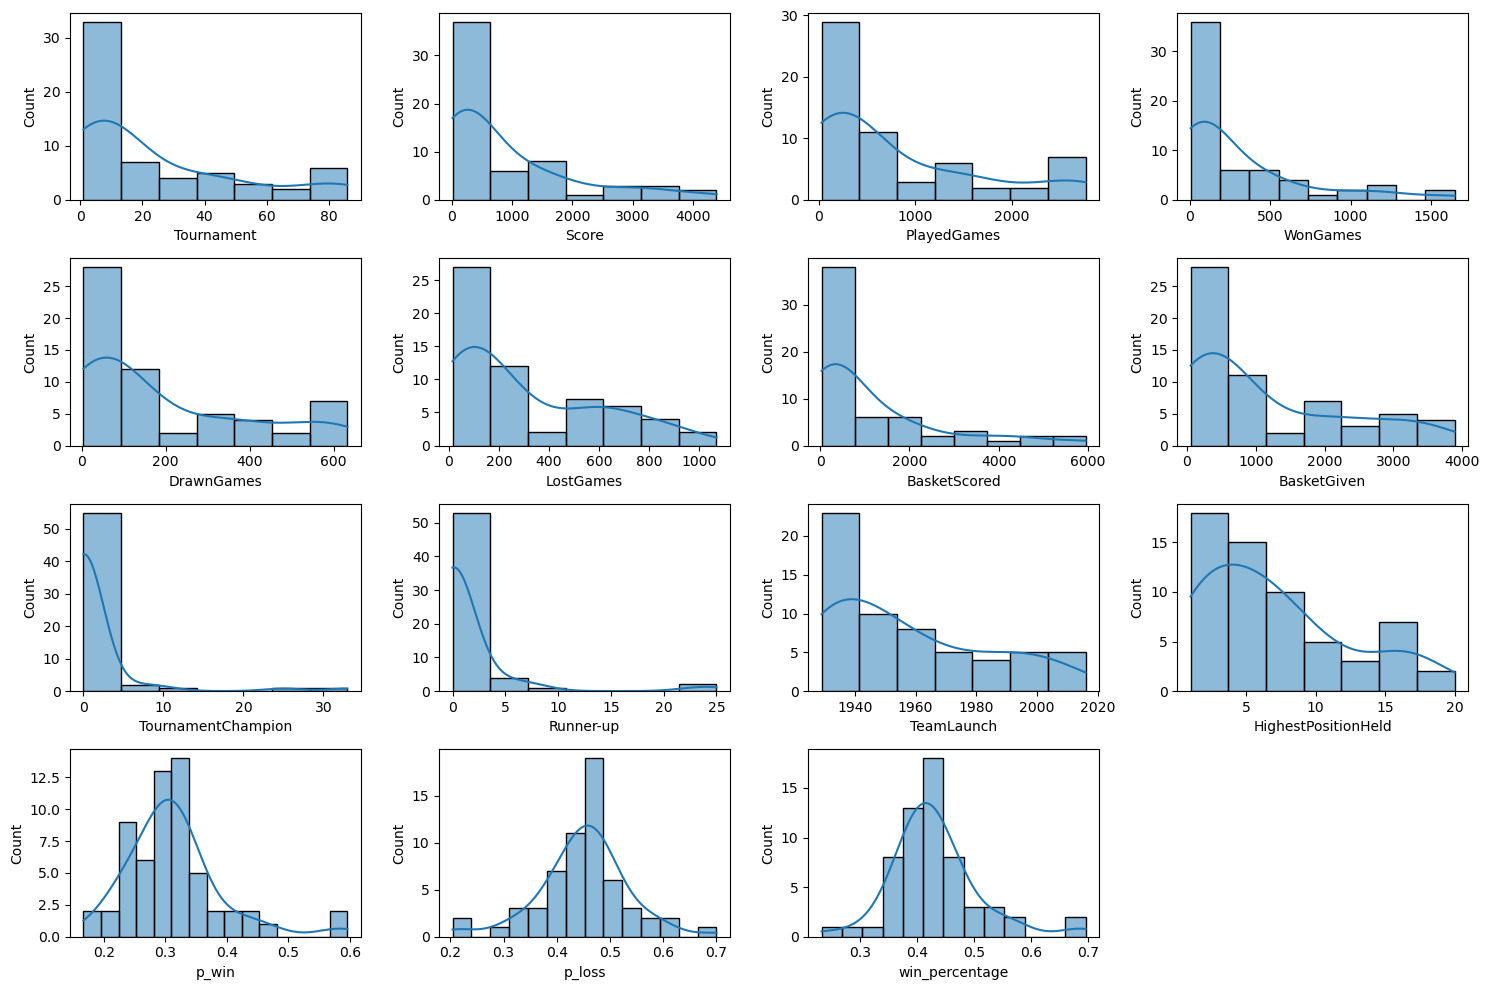

In [32]:
plt.figure(figsize=(15,10))
for i, column in enumerate(columns):
    plt.subplot(4,4,i+1)
    sns.histplot(data = basket_ball, x = column, kde = True)
    plt.tight_layout()
plt.show()

1) 'Tournament', 'Score', 'WonGames', 'BasketScored' columns are right-skewed.
2) As most of the rows in 'TournmentChampion, 'Runner-up' columns are zero's, these columns are highly skewed.
3) There might be some ouliers in 'WonGames', 'Score', 'p_loss', 'win_percentage' columns.

### Let's creat the boxplot To check the outliers.

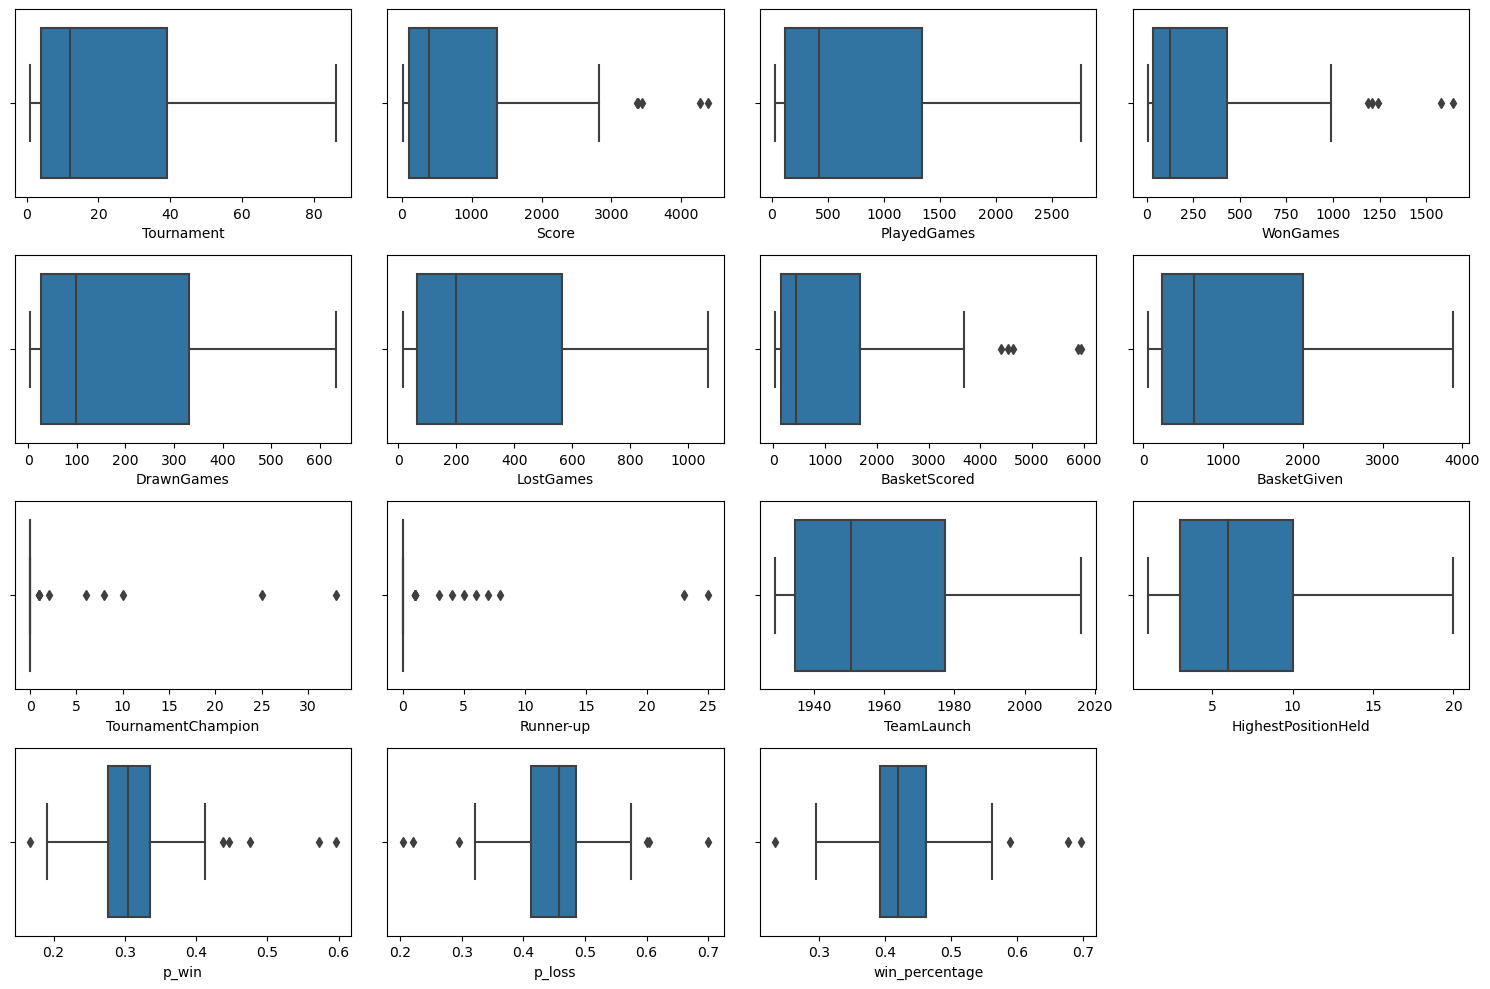

In [33]:
plt.figure(figsize=(15,10))
for i, column in enumerate(columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = basket_ball, x = column)
    plt.tight_layout()
plt.show()

1) There are a lot of outliers in 'TournmentChampion' and 'Runner-up' columns as most of the rows are zero's in these columns.
2) As predicted there are some ouliers in 'WonGames', 'Score', 'p_loss', 'win_percentage'columns.

### Let's plot the countplot  to check the counts of 'chance' column

<Axes: xlabel='chance', ylabel='count'>

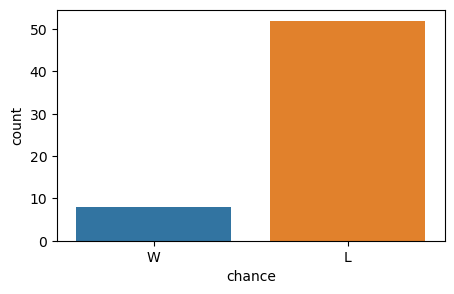

In [34]:
plt.figure(figsize=(5,3))
sns.countplot(data = basket_ball, x = 'chance')

1) The counts of chance of winnig teams are less than the counts of chance of losing teams.
2) Majority of the teams has probability of losing.

### Let's plot a countplot showing the number of teams launched in each year

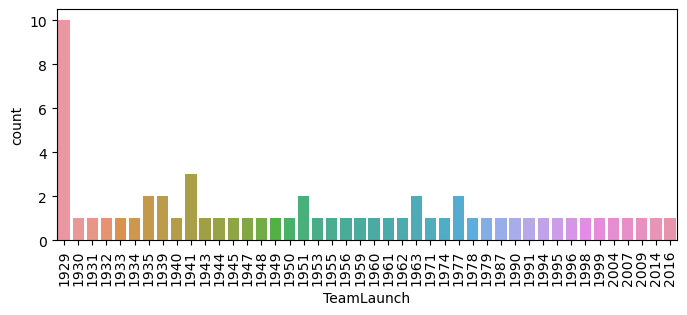

In [35]:
plt.figure(figsize = (8,3))
sns.countplot(basket_ball, x = 'TeamLaunch')
plt.xticks(rotation = 90);

1) 10 Teams has been launched in 1929.
2) Only 5 Teams has been launched after 2000.
3) In the majority of years, only a single team has been launched. 

### Bi-variate Analysis

### Let's Create a scatterplot to check the correlation between 'PlayedGames' with 'wonGames' and 'LostGames'

<Axes: xlabel='PlayedGames', ylabel='LostGames'>

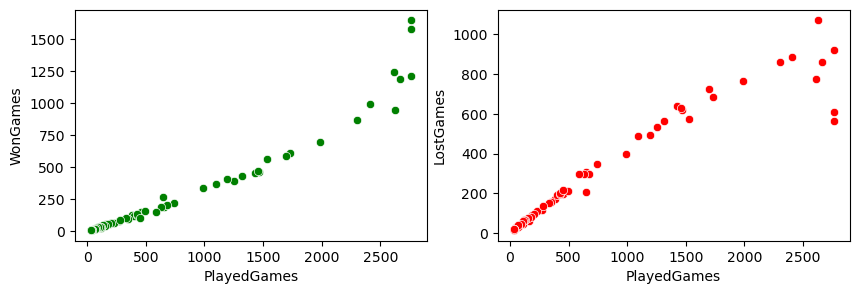

In [36]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.scatterplot(data = basket_ball, x = 'PlayedGames', y = 'WonGames', color = 'green')
plt.subplot(122)
sns.scatterplot(data = basket_ball, x = 'PlayedGames', y =  'LostGames', color = 'red')

1) There is a positive correlation between 'PlayedGames' and 'WonGames'.
2) As the count of 'PlayedGames' exceeds 2500, the count of 'LostGames' tends to decrease.

### Let's plot the patterns of the 'p_win' and 'p_lose' columns.

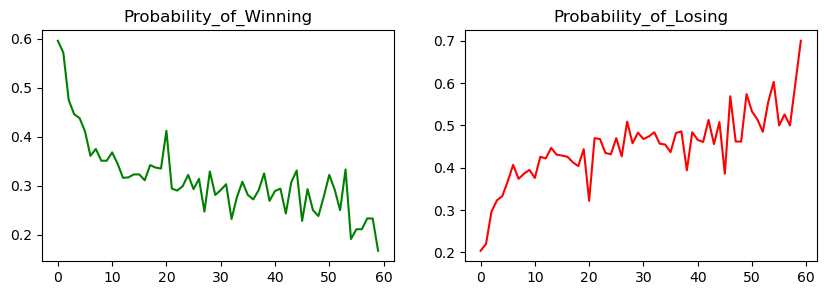

In [38]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('Probability_of_Winning')
plt.plot(basket_ball['p_win'], color = 'green')
plt.subplot(122)
plt.title('Probability_of_Losing')
plt.plot(basket_ball['p_loss'], color = 'red')

1) From the above plots, first 6 teams and team 21 has highest chance to win comparing with others.
2) Teams 55 to 60 are not performed well.

### Let's plot the top-10 and bottom-10 teams based on win_percentage

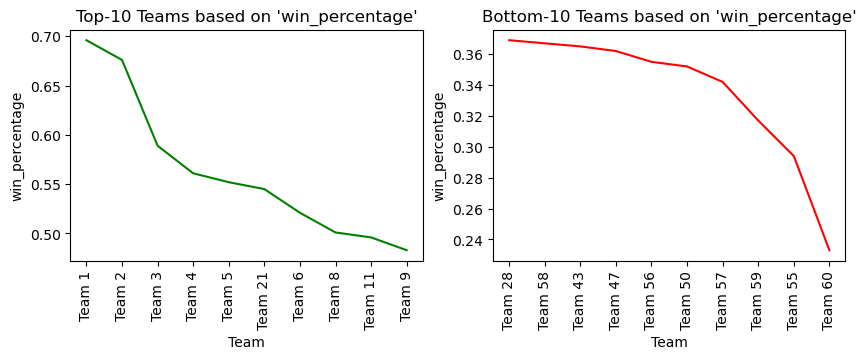

In [39]:
plt.figure(figsize = (10, 3))
plt.subplot(121)
sns.lineplot(x = 'Team', y = 'win_percentage', data = basket_ball.sort_values(by='win_percentage', ascending=False).head(10), markers = True, ci = False, color = 'green')
plt.title('Top-10 Teams based on \'win_percentage\'')
plt.xticks(rotation = 90);
plt.subplot(122)
sns.lineplot(x = 'Team', y = 'win_percentage', data = basket_ball.sort_values(by='win_percentage', ascending=False).tail(10), markers = True, ci = False, color = 'red')
plt.title('Bottom-10 Teams based on \'win_percentage\'')
plt.xticks(rotation = 90);

1) Here we can observe that 'Team1', 'Team2', 'Team3', 'Team4', 'Team5', 'Team21', 'Team6', 'Team8', 'Team11' and 'Team9' have the highest winning percentage.
2) Teams 28, 58, 43, 47, 56, 50, 57, 59, 55, 60 have the lowest win_percentage.

### Let's plot the performance of the teams based on the 'TeamLaunch' column.

<Axes: xlabel='TeamLaunch', ylabel='Score'>

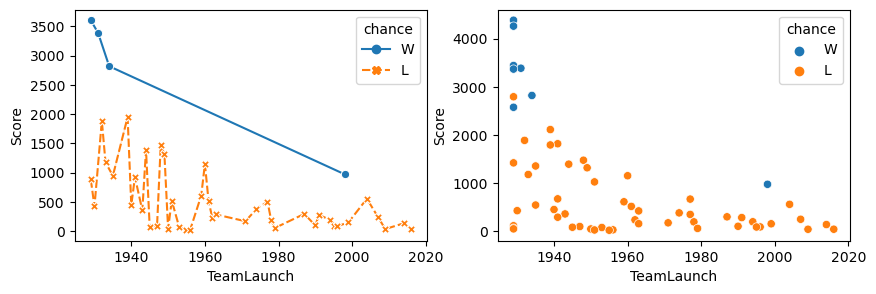

In [41]:
plt.figure(figsize = (10, 3))
plt.subplot(121)
sns.lineplot(data = basket_ball, x = 'TeamLaunch', y = 'Score', hue = 'chance', markers = True, style = 'chance', ci = False)
plt.subplot(122)
sns.scatterplot(data = basket_ball, x = 'TeamLaunch', y = 'Score', hue = 'chance')

1) Here we can observe that teams which are launched before 1940 has the highest winning rate.
2) Teams Launched after 2000 has the chance of losing.
3) Older teams have high probability to win the games comparing with teams launched after 2000.
4) We can conclude that the performance of older teams tends to be better. This could be because the older teams have participated in more tournaments compared to recently established teams.

### Let's plot a bar plot regarding the performance of the teams based on  'HighestPositionHeld'

<Axes: xlabel='HighestPositionHeld', ylabel='Team'>

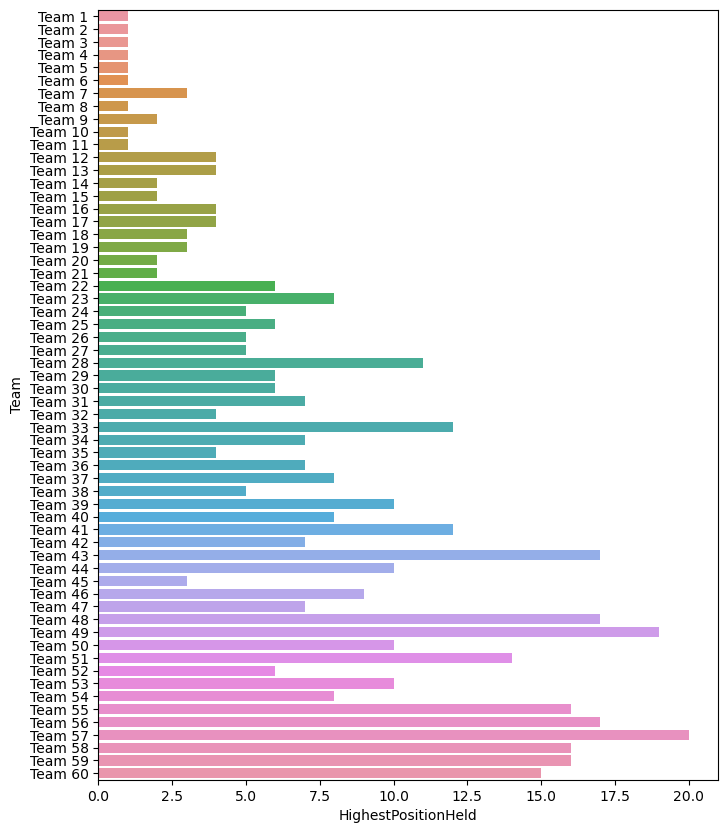

In [42]:
plt.figure(figsize = (8,10))
sns.barplot(data = basket_ball, y = 'Team', x = 'HighestPositionHeld')

1) Here we can observe that 'Team1', 'Team2', 'Team3', 'Team4', 'Team5', 'Team6', 'Team8', 'Team10', 'Team11' got HighestPosition '1'.
2) 'Team43', 'Team48', 'Team49', 'Team55', 'Team56', 'Team57', Team58', 'Team59', 'Team60', Highestposition's are greater than or equal to 15. 

### Let's look at the 'Runner-up' and 'TournamentChampion' columns

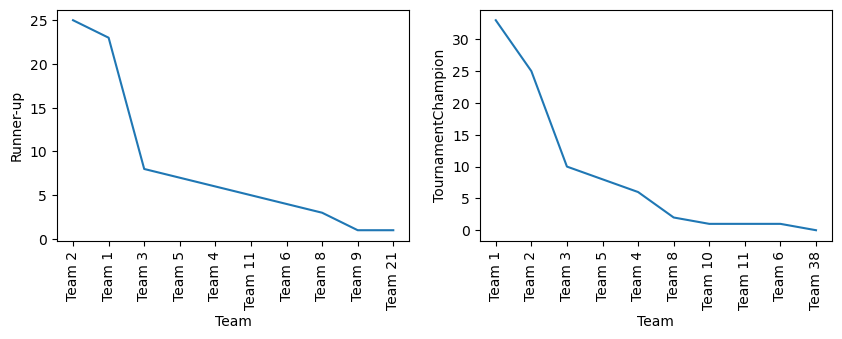

In [43]:
plt.figure(figsize = (10, 3))
plt.subplot(121)
sns.lineplot(data = basket_ball.sort_values(by = 'Runner-up', ascending = False).head(10), x = 'Team', y = 'Runner-up')
plt.xticks(rotation = 90)
plt.subplot(122)
sns.lineplot(data = basket_ball.sort_values(by = 'TournamentChampion', ascending = False).head(10), x = 'Team', y = 'TournamentChampion')
plt.xticks(rotation = 90);

1) From the above plots, we can see that 'Team1', 'Team2', 'Team3', 'Team4', 'Team5' have the highest counts of 'Runer-up' and 'TournamentChampion'.

### Multi-Variate Analysis

### Let's create a heatmap to check the correlation among the columns

<Axes: >

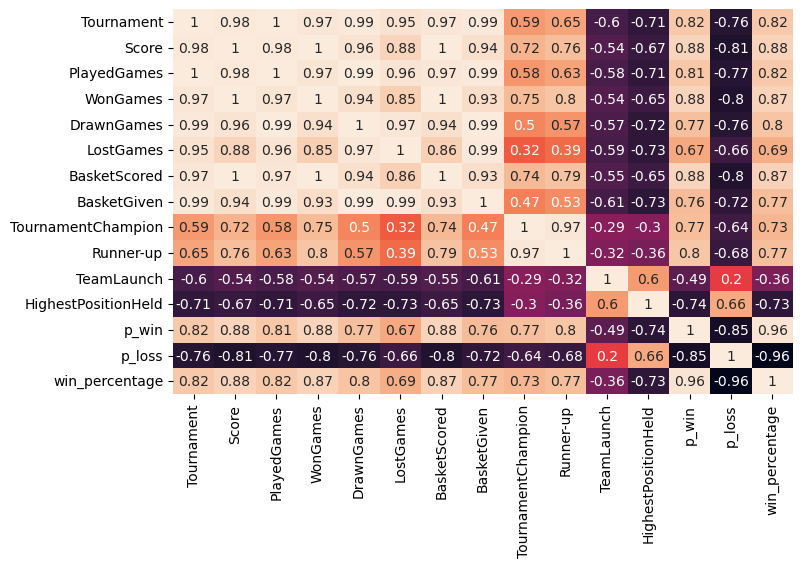

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(basket_ball[columns].corr(), annot = True, cbar = False)

1) 'BasketScored' and 'WonGames' have strong correlation with 'Score'.
2) As observed 'TeamLaunch' is negatively correlated as older teams performed well.
3) 'BasketGiven' and 'LostGames' are also strongly corelated. And 'HighestPositionHeld' is negatively corelated with others.

### Let's create a pairplot

<Figure size 1000x1000 with 0 Axes>

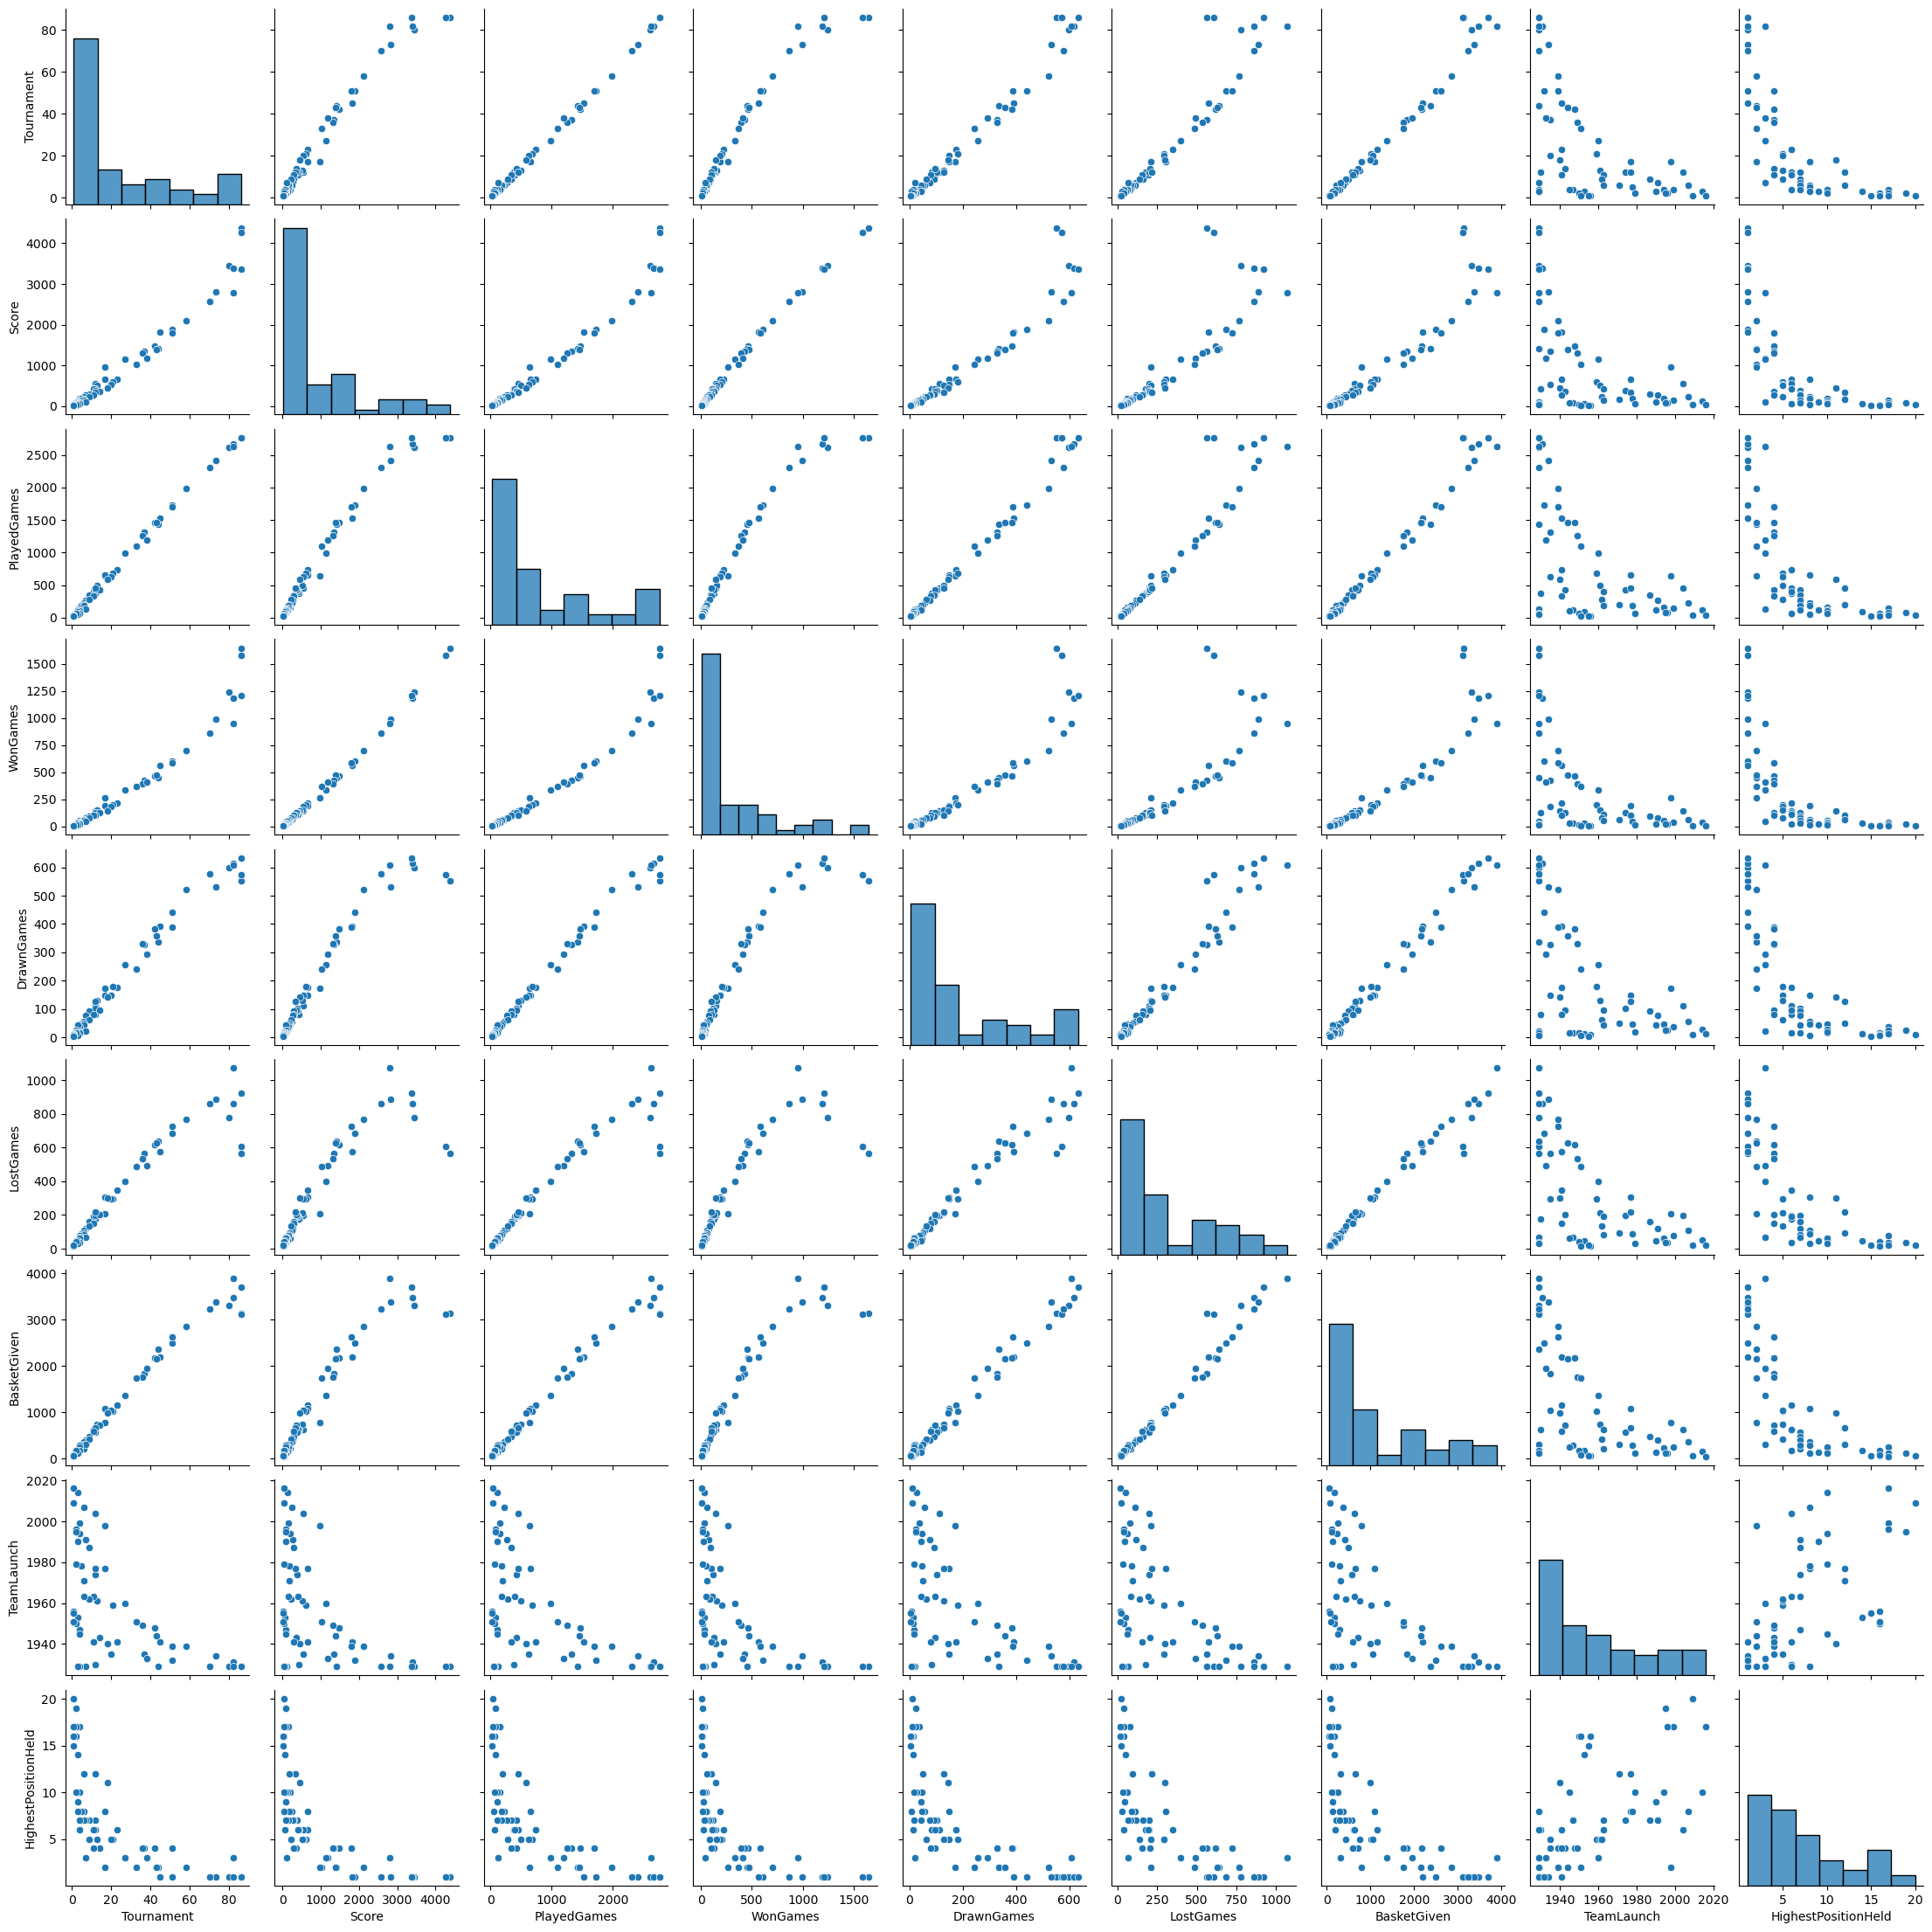

In [45]:
plt.figure(figsize = (10,10))
sns.pairplot(basket_ball[['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketGiven', 'TeamLaunch', 'HighestPositionHeld']])

1) 'TeamLaunch', 'HighestPositionHeld are negatively correlated with others.

### Key Insights


### Top performing teams

1) 'Team1', 'Team2', 'Team3', 'Team4', and 'Team5' are the best-performing teams based on various criteria such as high win percentage, achieving the highest position (1), and having the highest counts of 'Runner-up' and 'TournamentChampion'.
2) Company can consider these top_5 teams and these five teams has been launched before 1940. 
3) The company can consider approaching 'Team6', 'Team8', 'Team9', 'Team11', and 'Team21' after the previously mentioned top-performing teams. These additional teams also have high win percentages and have achieved the highest positions (1 or 2), making them worthy of consideration.
4) All these teams launched before 2000.

### Teams with lowest-performance

1) 'Team55', 'Team56', 'Team57', 'Team58', 'Team59', and 'Team60' have not performed well, as they have low win percentages and have held positions higher than 15.
1) The teams launched after 2000 have not performed well.
2) Most of the new teams have achieved a HighestPosition higher than '10' and have very low win percentages.

 ### (i) Quality

1) As in the 'TeamLaunch' column, years are given in intervals, so the results might not show the original year.
2) So, collecting accurate data is advisable for better analysis.

### (ii) Quantity

1) There are a lot of missing values in 'TournamentChampion' and 'Runner-up' columns. If the data were provided, it would be useful for effective analysis of performance of each team.
2) The dataset only contains 60 rows, so providing more data would enhance the effectiveness of the analysis.

### (iii) Variety

1) Additional information about team players, like where they belong and who the sponsors are, would be useful.

### (iv) Velocity

1) Here we are comparing the performance of the Teams of different times.
2) The data has not been collected continuously. As new teams have not played many tournaments, their performance is not as good compared to old teams.

### (v) Veracity

1) Providing high-quality data will definitely enhance the effectiveness of the analysis.
2) Additionally, supplying additional data about players, accurate data and increasing the size of the dataset will also support better analysis.